<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Abeal Sileshi

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [2]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [3]:
people_survived = df["Survived"].sum()
num_of_people = df["PassengerId"].count()

prob = people_survived/num_of_people
print("The probability of survival is: ", prob)


The probability of survival is:  0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Answer:**

* We wil want to evaluate two things, the probability of survival *given* you are a male, and the probability of survival *given* you are a high-class passenger. Then we can compare this to the overall population average that we calculated in Part A. If the male chivalry and first-class passenger theories are true, we will expect to see a lower probability of survival for males and higher probability of survival for first class passengers.


In [4]:
#P(Survived | Male)
males = df.loc[df["Sex"]== 'male'].count()
 

males_total = 577 #from looking at above counts

smales = df.loc[(df["Sex"]== 'male') & (df["Survived"]== 1)].count()
 

survived_males = 114 #from looking at above counts

p1 = survived_males/males_total
print("Probability of surviving as a male is: ", p1)

#P(Survived | Firstclass)
class1 = df.loc[df["Pclass"]== 1].count()

class1ppl = 216 #number of people in first class

s_class1 = df.loc[(df["Pclass"]== 1) & (df["Survived"]== 1)].count()

s_class1ppl = 137


p2 = s_class1ppl/class1ppl
print("Probability of surviving as a 1st class passenger: ", p2)


Probability of surviving as a male is:  0.1975736568457539
Probability of surviving as a 1st class passenger:  0.6342592592592593


**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [5]:
#This is the exploratory work that gave me an error and made me google for 3 hours to find the fix :)
# df1 = pd.read_csv(filepath)
# print(df1.shape)

# dropped = df1.dropna(subset=['Pclass']) 

# dropped = df1.dropna(subset=['Survived']) 
# dropped = df1.dropna(subset=['Pclass']) 
# dropped = df1.dropna(subset=['Age'])
# dropped =  df1.dropna(subset=['Sex'])

# # dropped = df1.dropna()

# print(dropped.shape)

#dropped.head(30)


dfTitanic = df.dropna(subset = ['Survived', 'Pclass', 'Age', 'Sex'])
dfTitanic.shape



(714, 12)

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [6]:
#P(Survived | Male) after cleaning up data
males_total1 = len(dfTitanic[dfTitanic["Sex"]=='male'])
print("This is how many men total there were", males_total1)

smales1 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'male') & (dfTitanic["Survived"]== 1)])
print("This is how many males survived", smales1)

p_1 = smales1/males_total1
print("Probability of surviving as a male is: ", p_1)

#P(Survived | Firstclass)
class1pop = len(dfTitanic[dfTitanic["Pclass"]== 1])
survivedclass1pop = len(dfTitanic.loc[(dfTitanic["Survived"]== 1) & dfTitanic["PassengerId"]== 1])

p_2 = survivedclass1pop/class1pop
print("Proportion of first class passengers that survived:  ", p_2)

#P(Survived as a women in first class) = P(survived and female given 1st class)
#fem_sur_c1 = len(dfTitanic.loc[dfTitanic["Survived"]== 1 & dfTitanic["Sex"]== 'female' & dfTitanic["Pclass"]== 1]

                
fem_sur_c1 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'female') & (dfTitanic['Survived']== 1) &(dfTitanic['Pclass']== 1)])

male_sur_c1 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'male') & (dfTitanic["Survived"]== 1) &(dfTitanic["Pclass"]== 1)])
print(male_sur_c1, "vs ", fem_sur_c1)
print("how many people are in class 1", class1pop)

p_3 = fem_sur_c1/class1pop
print("Proportion of females that survived as 1st class passengers", p_3)
p1_3 = male_sur_c1/class1pop 
print("Proportion of males that survived as 1st class passengers", p1_3)


male_sur_c2 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'male') & (dfTitanic["Survived"]== 1) &(dfTitanic["Pclass"]== 2)])
fem_sur_c2 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'female') & (dfTitanic["Survived"]== 1) &(dfTitanic["Pclass"]== 2)])

p_4 = fem_sur_c2/class1pop
print("Proportion of females that survived as 2nd class passengers", p_4)
p1_4 = male_sur_c2/class1pop
print("Proportion of males that survived as 2nd class passengers", p1_4)


male_sur_c3 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'male') & (dfTitanic["Survived"]== 1) &(dfTitanic["Pclass"]== 3)])
fem_sur_c3 = len(dfTitanic.loc[(dfTitanic["Sex"]== 'female') & (dfTitanic["Survived"]== 1) &(dfTitanic["Pclass"]== 3)])

p_5 = fem_sur_c3/class1pop
print("Proportion of females that survived as 3rd class passengers", p_5)
p1_5 = male_sur_c3/class1pop
print("Proportion of males that survived as 3rd class passengers", p1_5)



This is how many men total there were 463
This is how many males survived 91
Probability of surviving as a male is:  0.19654427645788336
Proportion of first class passengers that survived:   0.7380952380952381
36 vs  72
how many people are in class 1 168
Proportion of females that survived as 1st class passengers 0.42857142857142855
Proportion of males that survived as 1st class passengers 0.21428571428571427
Proportion of females that survived as 2nd class passengers 0.32142857142857145
Proportion of males that survived as 2nd class passengers 0.09523809523809523
Proportion of females that survived as 3rd class passengers 0.36904761904761907
Proportion of males that survived as 3rd class passengers 0.23214285714285715


**Answer**
- 1st class survival rates increase by ~.10 after removing NaN values from the dataset.
- The gender survival probability does not change
- Within each class, women are more likely to survive
- Women 3rd class passengers had a higher survival probablility than 1st class men
    - This supports the male chivalry hypothesis

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

Text(0, 0.5, 'Frequency')

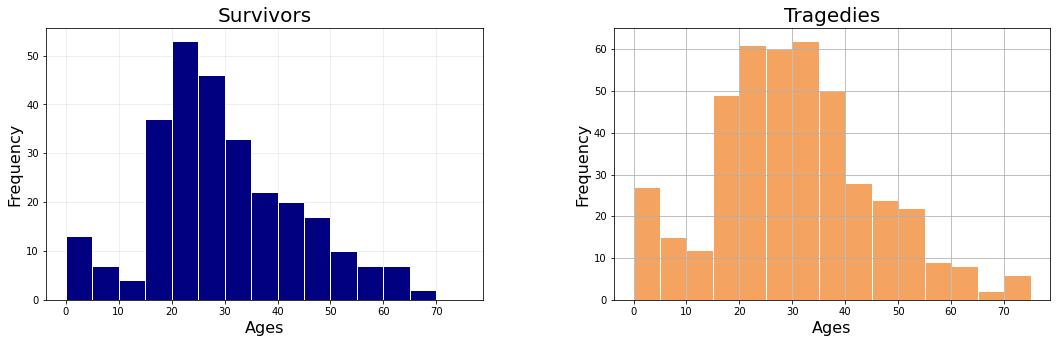

In [23]:
#two hists, survivors by age and nonsurvivors by age

#use df.loc
my_bins = range(0,80,5)
#Your Code here

# Initialize figure 
fig, axes = plt.subplots(nrows =1, ncols =2, figsize=(18,5))

# Plot histogram 
dfTitanic.loc[dfTitanic["Survived"]== 1].hist(column="Age",ax=axes[0], facecolor="navy", edgecolor="white", bins=my_bins);
# Add titles and labels 
axes[0].set_title("Survivors", fontsize=20)
axes[0].set_xlabel("Ages", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)


# Plot histogram 
dfTitanic.loc[dfTitanic["Survived"]== 0].hist(column="Age", ax=axes[1], facecolor="sandybrown", edgecolor="white", bins=my_bins);
axes[1].set_title("Tragedies", fontsize=20)
axes[1].set_xlabel("Ages", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)


#There isn't a clear relationship being shown between the two histograms, it seems like deaths are more concentrated 20-40, but this could be because there were 
#more people in these age ranges

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Answer** It would be misleading to plot as a frequency histogram because it'd wouldn't convey information about the probability/occurance of the events.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Answer** The data suggests class warfare and male chivalry. We saw earlier that women had greater probabilities of surviving in all classes and first class passengers fared better than the other passengers. In addition, we compared those probabilities to a base probability of the general population i.e. total survival/total population. 

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [24]:
dfPrecip = pd.read_csv('boulder_precip_12021.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [33]:
#Your code here
#1)
dfPrecip = dfPrecip.replace(['Tr'],0)
dfPrecip = dfPrecip.replace(['tr'],0)


#2)
dfPrecip = dfPrecip.drop(121)

#3)
dfPrecip['JAN'] = pd.to_numeric(dfPrecip['JAN'],errors='coerce')
dfPrecip['FEB'] = pd.to_numeric(dfPrecip['FEB'],errors='coerce')
dfPrecip['MAR'] = pd.to_numeric(dfPrecip['MAR'],errors='coerce')
dfPrecip['APR'] = pd.to_numeric(dfPrecip['APR'],errors='coerce')
dfPrecip['MAY'] = pd.to_numeric(dfPrecip['MAY'],errors='coerce')
dfPrecip['JUN'] = pd.to_numeric(dfPrecip['JUN'],errors='coerce')
dfPrecip['JUL'] = pd.to_numeric(dfPrecip['JUL'],errors='coerce')
dfPrecip['AUG'] = pd.to_numeric(dfPrecip['AUG'],errors='coerce')
dfPrecip['SEP'] = pd.to_numeric(dfPrecip['SEP'],errors='coerce')
dfPrecip['OCT'] = pd.to_numeric(dfPrecip['OCT'],errors='coerce')
dfPrecip['NOV'] = pd.to_numeric(dfPrecip['NOV'],errors='coerce')
dfPrecip['DEC'] = pd.to_numeric(dfPrecip['DEC'],errors='coerce')



**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

<AxesSubplot:>

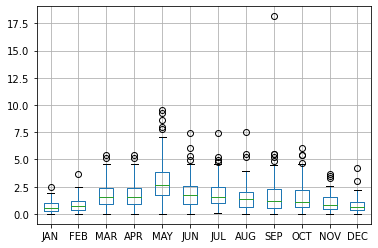

In [34]:
dfPrecip.boxplot(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"])


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

In [ ]:
#Your code here

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [ ]:
#Code here

**Typeset your analysis to part D in this cell or cells**

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

In [ ]:
# September box plot code here

**Typeset your analysis for part E in this cell or cells**

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [ ]:
# September code here

**Typeset your analysis for part F in this cell or cells**

[Back to top](#top)